In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [46]:
df['taxinc']=pd.cut(df['Taxable.Income'],bins=[10000,30000,99620],labels=['risky','good'])

In [6]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxinc
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good


In [44]:
df1=pd.get_dummies(df)

In [45]:
df1.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,taxinc_risky,taxinc_good
0,68833,50047,10,1,0,0,0,1,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1,0,1
2,36925,160205,30,1,0,0,1,0,0,1,0,1
3,50190,193264,15,0,1,0,0,1,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0,0,1


In [47]:
df1.drop(df1.columns[[3,5,8,10]],axis=1,inplace=True)

In [48]:
df1.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,taxinc_good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


In [12]:
import seaborn as sns

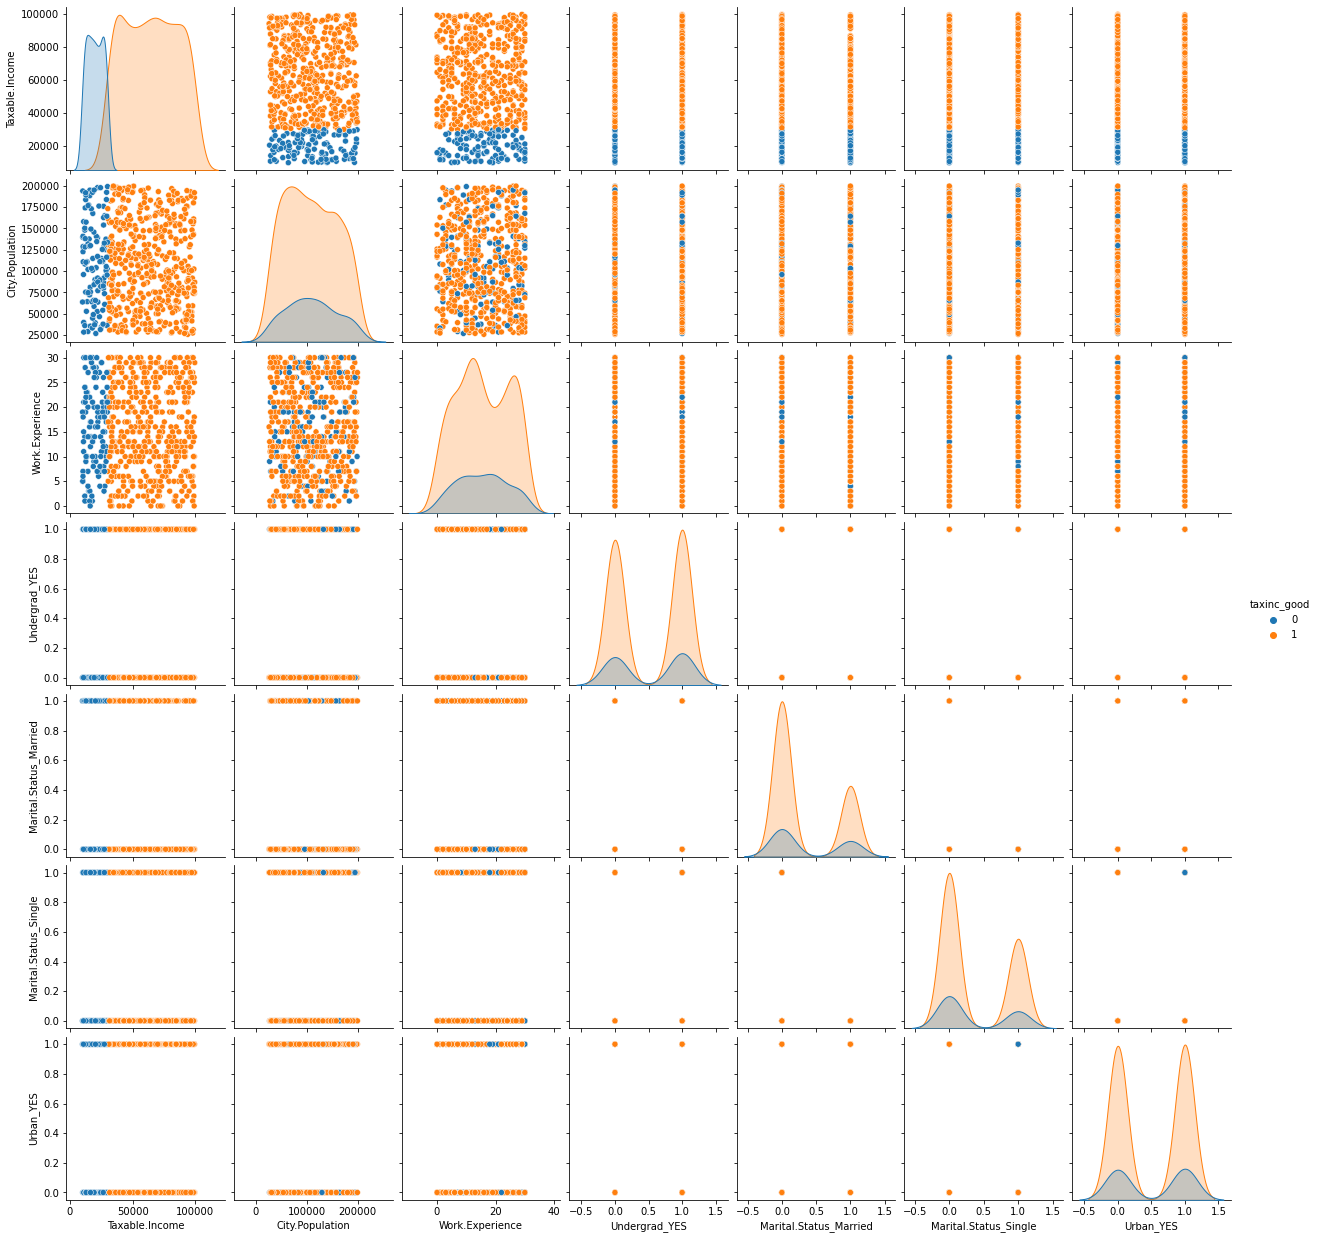

In [13]:
sns.pairplot(data=df1, hue='taxinc_good')

In [49]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)


In [50]:
df1_norm=norm_func(df1.iloc[:,1:])

In [51]:
df1_norm.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,taxinc_good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0


In [52]:
x=df1_norm.drop(['taxinc_good'],axis=1)
y=df1_norm['taxinc_good']

In [53]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: taxinc_good, dtype: float64

In [54]:
x.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [57]:
from sklearn.tree import  DecisionTreeClassifier

In [58]:
from sklearn import tree

In [59]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [60]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [61]:
pred=model.predict(x_test)

In [62]:
pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [37]:
pd.Series(pred).value_counts

<bound method IndexOpsMixin.value_counts of 0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
115    1.0
116    1.0
117    1.0
118    1.0
119    1.0
Length: 120, dtype: float64>

In [63]:
import numpy as np

In [64]:
np.mean(pred==y_test)*100

78.33333333333333

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.99      0.79      0.88       119

    accuracy                           0.78       120
   macro avg       0.49      0.39      0.44       120
weighted avg       0.98      0.78      0.87       120

